# Least Squares Tutorial

In [1]:
import numpy as np
import matplotlib.pyplot as plt

n = 100
x = np.arange(n).flatten()

y = np.random.rand(n,1).flatten()
y = y*(x*0.03) + x*0.01
plt.scatter(x,y, c='red')

In [2]:
from IPython.display import HTML
# border-color: #dFb5b4; border-left: 150px solid #dfb5b4; padding: 0.5em;
style = "<style>div.warn {font-family: Verdana; font-size: 16px;} </style>"
HTML(style)

<div class="warn">

## Way 1

### Partial derivatives (system of equations)

<div class="warn">
    
we need to define a line 

$${ y = kx+b }$$ 

such that the error betwee each of its y-coordinate and the y-coordinate of the corresponding (lying on the same x-coordinate) data points (${y_i}$) is minimized. We will only care about absolute values of the errors, so we'll use the squares.
$${L(k,b) = \sum_{i}{(y_i - kx_i - b)^2}}$$
We need to find to differentiate (using the chain rule) this expression and set it to zero. That's where this loss (error) will be minimized.


$$\begin{cases} \frac{\partial L}{\partial k} = -2 \sum_{i}{(y_i - kx_i-b)*x_i = 0} \\ \frac{\partial L}{\partial b} = -2 \sum_{i}{(y_i - kx_i-b)*1} = 0 \end{cases}$$

Dropping the -2 and expading the brackets and the sums (for convenience), we have:

$$\begin{cases} \frac{\partial L}{\partial k} = \sum_{i}{y_ix_i} - k\sum_{i}{x_ix_i} - b\sum_{i}{x_i} = 0 \\ \frac{\partial L}{\partial b} = \sum_{i}{y_i} - k\sum_{i}{x_i}-b\sum_{i}{1} = 0 \end{cases}$$

The sigmas are in fact dot products. Let's rewrite the system of equations to get rid of the clutter:




Now solve for $k$ and for $b$


$$\begin{cases} \mathbf{y}^\top \mathbf{x} - k \mathbf{x}^\top \mathbf{x} = b\sum_{i}{x_i}\\
\sum_{i}{y_i} - k \sum_{i}{x_i} = bn \end{cases}$$

Now lets multiply both sides of the second equation in the system by $\frac{\sum_{i}{x_i}}{n}$

$$\begin{cases} \mathbf{y}^\top \mathbf{x} - k \mathbf{x}^\top \mathbf{x} = b\sum_{i}{x_i}\\
\sum_{i}{y_i}\frac{\sum_{i}{x_i}}{n} - k \sum_{i}{x_i}\frac{\sum_{i}{x_i}}{n} = bn\frac{\sum_{i}{x_i}}{n} \end{cases}$$

The right terms of both equations are now equal. We can subtract the secod from the first to get rid (temporarily) of the term containing the unknown variable $b$, and solve for $k$. 


$$ k = \frac{\mathbf{y}^\top \mathbf{x} - \sum_{i}{y_i}a}{\mathbf{x}^\top \mathbf{x} - \sum_{i}{x_i}a}$$
where $$ a = \frac{\sum_{i}{x_i}}{n}$$



Then we'll solve similarly for $b$, for which we need to get rid of the terms contaning $k$. For this we need to multiply the second equation by $\frac{\mathbf{x}^\top \mathbf{x}}{\sum_{i}{x_i}}$ and then, to cancel the terms containing $k$, subtract this second equation from the first one, and solve for $b$:

$$ b = \frac{\mathbf{y}^\top \mathbf{x} - \sum_{i}{y_i}a}{\sum_{i}{x_i} - na}$$
where $$ a = \frac{\mathbf{x}^\top \mathbf{x}}{\sum_{i}{x_i}}$$

</div>

In [3]:
a = np.sum(x)/n
k = (np.dot(y,x) - np.sum(y)*a)/(np.dot(x,x) - np.sum(x)*a)
print('k', k)
a = np.dot(x,x)/np.sum(x)
b = (np.dot(y,x) - np.sum(y)*a)/(np.sum(x) - n*a)
print('b', b)

k 0.02522797904701409
b 0.02587862974767416


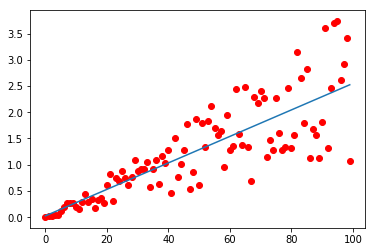

In [4]:
y_p = k*x + b
plt.scatter(x,y, color='red')
plt.plot(x,y_p)


<div class="warn">
## Way 2
WE can also use SVD (PCA) to find the best fit line. Then first eigenvector is the direction of the best fit line 

Text(0.5,1,'k = -1.00 \t b = -0.03')

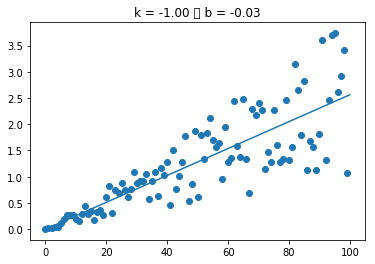

In [5]:
X = np.vstack([x,y])
U,S,V = np.linalg.svd(X)
plt.scatter(X[0,:], X[1,:])
plt.plot([0, abs(U[0,0]*100)], [0, abs(U[1,0]*100)])
plt.title('k = {:.2f} \t b = {:.2f}'.format(U[0,0], U[1,0]))

<div class="warn">
## Way 3

We can also do a trick and plug the intercept (bias) coefficient into the weight vector $\beta$ as the last element. We will also need to add an additional 'variable' to the data as the last column of ones. (**Column, if your predictors are in columns. Don't get confused, because in EEG predictors are in rows, while time samples are in columns**)

<div class="warn">
$$ L = \frac{1}{2}(\mathbf{X} \mathbf{\beta} - \mathbf{y})^2 $$

$$ \frac{dL}{d\beta} = (\mathbf{X}^{\top}-\mathbf{y})\mathbf{X}^{\top} $$

set the derivative to zero, expand, and rearrange, multiply by inverse from the left:


$$ (\mathbf{X}^{\top}\mathbf{X})^{-1}\mathbf{X}^{\top}\mathbf{X}  \mathbf{\beta} = (\mathbf{X}^{\top}\mathbf{X})^{-1} \mathbf{X}\mathbf{y} $$

$$\mathbf{\beta} = (\mathbf{X}^{\top}\mathbf{X})^{-1} \mathbf{X}\mathbf{y} $$

In [6]:
l = X.shape[1]
x = X[0,:].reshape(l,1)
x = np.concatenate((x, np.ones((l,1))), axis=1)
y = X[1,:].reshape(l,1)
# beta = np.linalg.inv(np.dot(x.T,x))
beta = (np.linalg.inv(np.dot(x.T,x))).dot(x.T).dot(y)
print('k = {:.4f} \t b = {:.4f}'.format(beta[0,0], beta[1,0]))

k = 0.0252 	 b = 0.0259


## How good is the fit?

In [7]:
x = x[:,0].flatten()

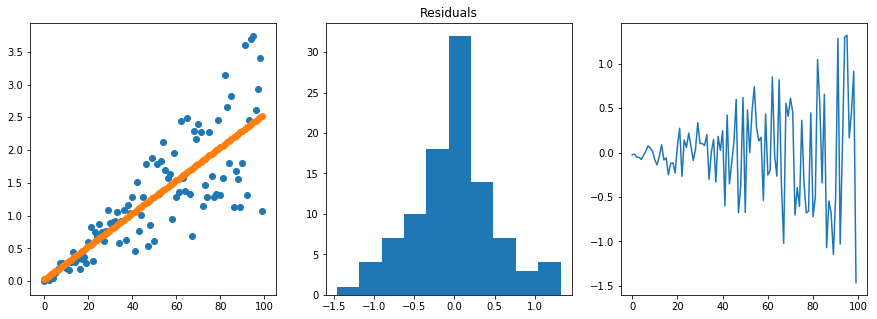

In [8]:
k = beta[0,0]
b = beta[1,0]
y = k*x + b

plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.scatter(X[0,:], X[1,:])
plt.scatter(x,y)
# compute and plot residuals:
resid = X[1,:] - y
plt.subplot(1,3,2)
plt.hist(resid)
plt.title('Residuals')
plt.subplot(1,3,3)
q = plt.plot(resid)

<div class="warn">
## Compute goodness of fit ($R^{2}$)
$$ Goodness.of.fit = \frac{variance.explained.by.the.model}{total.variance.in.the.response.var}$$




$$ \mathbf{R^{2} = \frac{Var(y_{GT}) - Var(y_{resid})}{Var(y_{GT})}}$$

In [21]:
print('Total variance in the response variable:\t', np.var(X[1,:]))
print('unexplaided variance:\t\t\t\t', np.var(resid))
print('Explained variance (R^2):\t\t\t', (np.var(X[1,:])-np.var(resid))/np.var(X[1,:]))
print('Check if it is correct using another method:\t', np.corrcoef(X[1,:].flatten(), y)[0,1]**2)

Total variance in the response variable:	 0.7969303517755365
unexplaided variance:				 0.2666076170222846
Explained variance (R^2):			 0.6654568163600609
Check if it is correct using another method:	 0.6654568163600612


In [22]:
np.var(X[1,:])

0.7969303517755365

In [23]:
np.var(y)

0.5303227347532522

In [24]:
R = np.cov(X[1,:], y)[0,1]/np.sqrt(np.var(X[1,:])*np.var(y))
print('R\t', R)
print('R2\t', R**2)

R	 0.8239953186980269
R2	 0.678968285236263


In [25]:
np.cov(X[1,:], y)

array([[0.80498015, 0.53567953],
       [0.53567953, 0.53567953]])